In [3]:
import logging
import os
import pandas as pd

from pathlib import Path

%load_ext autoreload
%autoreload 2

# Disable logging of the program in the notebook
os.environ["LOGLEVEL"] = "CRITICAL"

logging.basicConfig()
logging.root.setLevel(logging.INFO)
logging.basicConfig(level=logging.INFO)

logger = logging.getLogger('__main__')
logger.setLevel(os.environ.get("LOGLEVEL", logging.FATAL))

pybooklogger = logging.getLogger('pybook')
pybooklogger.setLevel(logging.DEBUG)

%aimport setup

from setup import *
from tad_help import TadRunner

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Track Layout
Calculate the layout of the dutch railway system


In [4]:
layout_file =   "../data/prorail/parsed/netherlands-schiphol.json"
layout = Layout(layout_file)

..\data\prorail\scenarios\TAD\Zwolle\2025-07-21_1.json


INFO:pybook.setup:Setting up experiment {'start_time': np.float64(660.0), 'origin': 'AMF|2', 'destination': 'LW|4', 'filter_agents': np.int64(36), 'metadata': {'offset': 0, 'color': 'Red', 'label': 'No flexibility'}, 'velocity': 38.888888888888886, 'max_buffer_time': 0, 'use_recovery_time': False}
INFO:pybook.setup:Setting up experiment {'start_time': np.float64(660.0), 'origin': 'AMF|2', 'destination': 'LW|4', 'max_buffer_time': 900, 'filter_agents': np.int64(36), 'metadata': {'color': 'Green', 'label': 'Buffer time', 'offset': 0}, 'velocity': 38.888888888888886, 'use_recovery_time': False}
INFO:pybook.setup:Setting up experiment {'start_time': np.float64(660.0), 'origin': 'AMF|2', 'destination': 'LW|4', 'max_buffer_time': 900, 'use_recovery_time': True, 'filter_agents': np.int64(36), 'metadata': {'color': 'Blue', 'label': 'Recovery time', 'offset': 0}, 'velocity': 38.888888888888886}
DEBUG:pybook.setup:Running: ../search/buildDir/atsipp.exe --start r-Amf|5510 --goal r-Lw|118 --edgegr

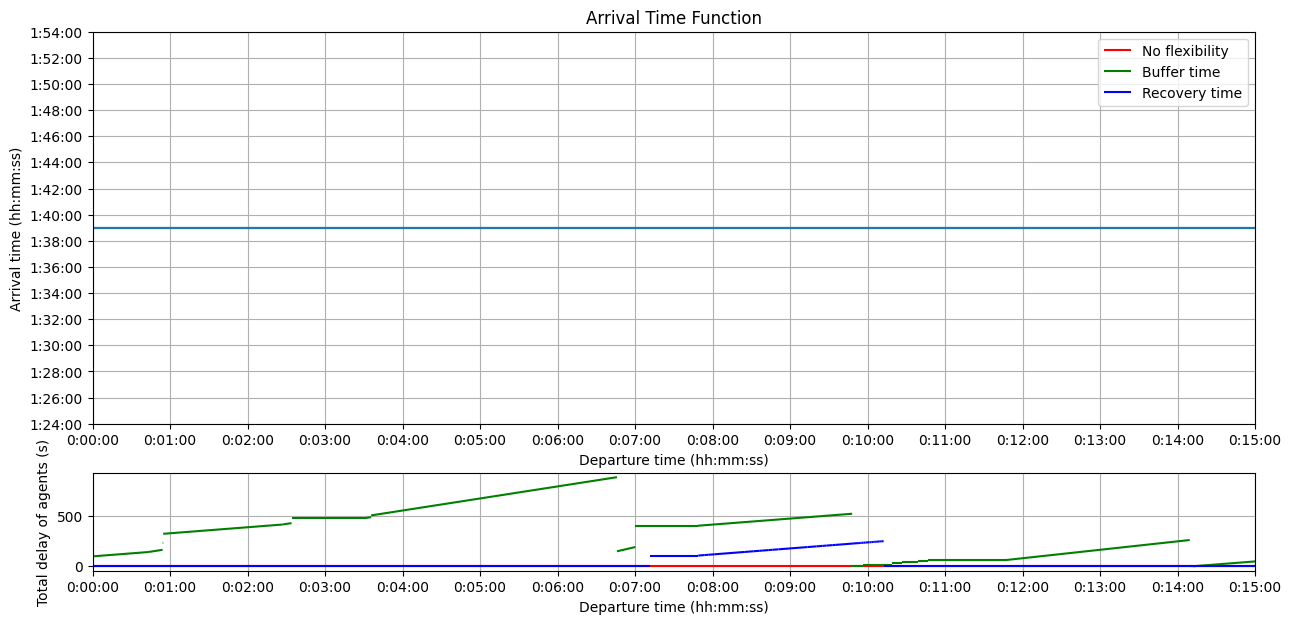

..\data\prorail\scenarios\TAD\Zwolle\2025-07-21_2.json
single positional indexer is out-of-bounds
..\data\prorail\scenarios\TAD\Zwolle\2025-07-21_3.json


INFO:pybook.setup:Setting up experiment {'start_time': np.float64(1620.0), 'origin': 'AMF|2', 'destination': 'LW|4', 'filter_agents': np.int64(21), 'metadata': {'offset': 0, 'color': 'Red', 'label': 'No flexibility'}, 'velocity': 38.888888888888886, 'max_buffer_time': 0, 'use_recovery_time': False}
INFO:pybook.setup:Setting up experiment {'start_time': np.float64(1620.0), 'origin': 'AMF|2', 'destination': 'LW|4', 'max_buffer_time': 900, 'filter_agents': np.int64(21), 'metadata': {'color': 'Green', 'label': 'Buffer time', 'offset': 0}, 'velocity': 38.888888888888886, 'use_recovery_time': False}
INFO:pybook.setup:Setting up experiment {'start_time': np.float64(1620.0), 'origin': 'AMF|2', 'destination': 'LW|4', 'max_buffer_time': 900, 'use_recovery_time': True, 'filter_agents': np.int64(21), 'metadata': {'color': 'Blue', 'label': 'Recovery time', 'offset': 0}, 'velocity': 38.888888888888886}
DEBUG:pybook.setup:Running: ../search/buildDir/atsipp.exe --start r-Amf|5510 --goal r-Lw|118 --edg

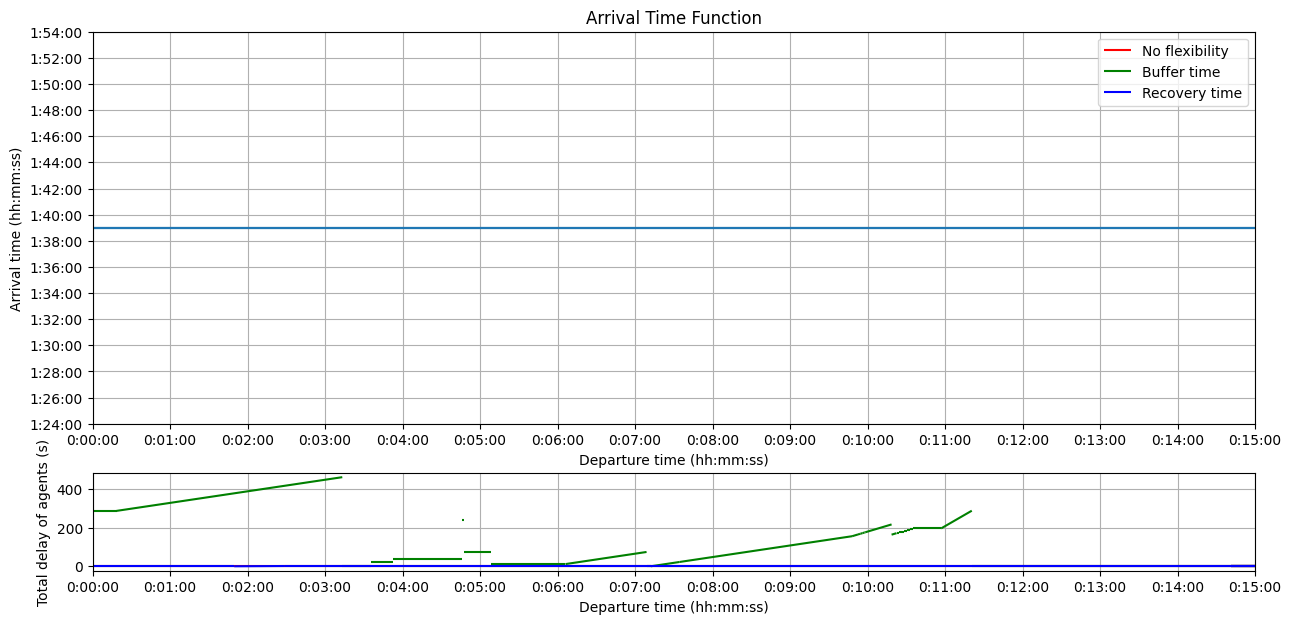

..\data\prorail\scenarios\TAD\Zwolle\2025-07-22_1.json
nan|1 is not a station


In [5]:
scenario_files = Path("../data/prorail/scenarios/TAD/Zwolle")
save_dir = r"C:\Users\erick\Documents\uni\Thesis\delay-replannning\experiments\results\tad"
path_data = []
for scenario_file in os.listdir(scenario_files):
# for scenario_file in ["2025-07-21_1.json", "2025-07-21_2.json", "2025-07-21_3.json"]:
    try:
        tad_exp = TadRunner(layout, scenario_files / scenario_file, save_dir)
        experiments = tad_exp.run("600", "o", "AMF", "LW", default_direction=1)
        experiments[0].metadata = {'color': 'Red',   'label': '@SIPP',    'offset': 0, 'linestyle': 3}
        experiments[1].metadata = {'color': 'Blue',  'label': 'FlexSIPP', 'offset': 0, 'linestyle': 3}

        tad_exp.plot(experiments, save="600o-ZL")
        tad_exp.plot([experiments[0]], save="600o-ZL/atsipp")
        tad_exp.plot([experiments[1]], save="600o-ZL/flexsipp")
        path_data.extend(get_path_data(experiments, tad_exp.agent_df, scenario=scenario_file))
    except Exception as e:
        print(e)


In [6]:
tad_exp._get_series("600", "o")

,id,origin,destination,velocity,start_time,endTime,startTimeHuman,endTimeHuman,trainNumber,trainUnitTypes,stops
29,30,ZL|7,LW|4,38.888889,600.0,3960.0,0:10:00,1:06:00,645,[DDZ],"[{'expected_arrival': 1500.0, 'location': 'MP|..."
20,21,UT|12,LW|4,38.888889,780.0,7560.0,0:13:00,2:06:00,649,[ICM],"[{'expected_arrival': 1500.0, 'location': 'AMF..."


In [7]:
tad_exp._get_series("700", "o")

,id,origin,destination,velocity,start_time,endTime,startTimeHuman,endTimeHuman,trainNumber,trainUnitTypes,stops
40,41,ZL|6,GN|4,38.888889,420.0,3840.0,0:07:00,1:04:00,745,[DDZ],"[{'expected_arrival': 2820.0, 'location': 'ASN..."
18,19,ALM|4,GN|4,38.888889,1500.0,7440.0,0:25:00,2:04:00,749,[ICM],"[{'expected_arrival': 2280.0, 'location': 'LLS..."


In [8]:
tad_exp._get_series("6100", "o")

,id,origin,destination,velocity,start_time,endTime,startTimeHuman,endTimeHuman,trainNumber,trainUnitTypes,stops
43,44,ASN|3,GN|7,38.888889,240.0,1380.0,0:04:00,0:23:00,6141,[SNG],"[{'expected_arrival': 960.0, 'location': 'HRN|..."
31,32,HGV|1,GN|6,38.888889,660.0,2940.0,0:11:00,0:49:00,6143,[SNG],"[{'expected_arrival': 1140.0, 'location': 'BL|..."
30,31,ZL|14,GN|7,38.888889,840.0,4740.0,0:14:00,1:19:00,6145,[SNG],"[{'expected_arrival': 1800.0, 'location': 'MP|..."
11,12,ZL|14,GN|7,38.888889,2640.0,6540.0,0:44:00,1:49:00,6147,[SNG],"[{'expected_arrival': 3600.0, 'location': 'MP|..."
19,20,ZL|14,GN|7,38.888889,4440.0,8340.0,1:14:00,2:19:00,6149,[SNG],"[{'expected_arrival': 5400.0, 'location': 'MP|..."


In [9]:
tad_exp._get_series("9000", "o")

,id,origin,destination,velocity,start_time,endTime,startTimeHuman,endTimeHuman,trainNumber,trainUnitTypes,stops
12,13,MP|3,LW|4,38.888889,240.0,2940.0,0:04:00,0:49:00,9045,[SNG],"[{'expected_arrival': 780.0, 'location': 'SWK|..."
50,51,KPNZ|2,LW|5,38.888889,360.0,4740.0,0:06:00,1:19:00,9047,[SNG],"[{'expected_arrival': 960.0, 'location': 'ZL|7..."
13,14,LLS|2,LW|4,38.888889,900.0,6540.0,0:15:00,1:49:00,9049,[SNG],"[{'expected_arrival': 1680.0, 'location': 'DRO..."
2,3,LLS|4,LW|5,38.888889,2700.0,8340.0,0:45:00,2:19:00,9051,[SNG],"[{'expected_arrival': 3480.0, 'location': 'DRO..."


In [10]:
path_df = pd.DataFrame(path_data)
path_df.to_csv(save_dir + "/600o-Zl.csv")

filter_cols = ["zeta", "delta", "label", "id", "origin", "destination", "velocity", "start_time", "endTime", "startTimeHuman", "endTimeHuman", "trainUnitTypes", "stops", "scenario"]

path_df.loc[path_df["scenario"] == "2025-07-21_1.json"].loc[path_df["label"] == "Recovery time"].drop(filter_cols, axis=1)

,path,alpha,beta,trainNumber,delay_location,delay_amount
53,r-Amf|5510;r-Amf|5542;r-Amf|687;r-Amfs|5644;r-...,1.17,5.15,840,r-Hr_Wv|729,0.0000
54,r-Amf|5510;r-Amf|5542;r-Amf|687;r-Amfs|5644;r-...,1.17,5.15,536,r-Zl|4370,0.0000
55,r-Amf|5510;r-Amf|5542;r-Amf|687;r-Amfs|5644;r-...,1.17,5.15,9033,r-Hr|80,0.0000
56,r-Amf|5510;r-Amf|5542;r-Amf|687;r-Amfs|5644;r-...,1.17,5.15,9035,r-Zl|4226,0.0000
57,r-Amf|5510;r-Amf|5542;r-Amf|687;r-Amfs|5644;r-...,1.17,5.15,9040,r-Wv|62,0.0000
...,...,...,...,...,...,...
265,r-Amf|5510;r-Amf|5542;r-Amf|687;r-Amfs|5644;r-...,611.92,612.47,9033,r-Akm-Lw|763,158.1920
266,r-Amf|5510;r-Amf|5542;r-Amf|687;r-Amfs|5644;r-...,611.92,612.47,733,r-Mp|242,10.9238
267,r-Amf|5510;r-Amf|5542;r-Amf|687;r-Amfs|5644;r-...,611.92,612.47,9042,r-Akm|138,180.5440
268,r-Amf|5510;r-Amf|5542;r-Amf|687;r-Amfs|5644;r-...,707.71,816.67,733,r-Zl|4376,0.0000


In [13]:
def extract_tipping_point(df):
    def apply_func(df):
        result=df.groupby("delay_location").agg({"beta": lambda x: str(timedelta(seconds=x.max()))}).rename(columns={
            "beta": "tipping_point"})
        return result

    df["delay_location"] = df["delay_location"].str.split("|").apply(lambda x: x[0])
    df = df.groupby(by='trainNumber').apply(apply_func, include_groups=False)
    return df

path_df.groupby(["scenario", "label"]).apply(extract_tipping_point, include_groups=False)

tipping_point
scenario          label         trainNumber delay_location                
2025-07-21_1.json Buffer time   6138        r-Mp            0:02:34.080000
                                638         r-Mp            0:00:54.740000
                                733         r-Ddv           0:10:50.850000
                                            r-Htba          0:06:46.030000
                                            r-Zl            0:14:09.450000
...                                                                    ...
2025-07-21_3.json Recovery time 9051        r-Mp            0:11:39.260000
                                            r-Zl            0:05:36.920000
                                9052        r-Htba          0:07:33.230000
                                            r-Zl            0:05:27.700000
                                9056        r-Wv            0:03:35.680000

[62 rows x 1 columns]

# Experiment Runtime
Take a route of an agent with many stops, and run from start to every stop as an experiment

## Results


### ATF Plot

### Blocking staircase diagram
Showing the route of the agent with the most stops, its quite long.


C:\Users\erick\Documents\uni\Thesis\delay-replannning\generation\safe_interval_graph.py:139: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(timedelta(seconds=ytick)) for ytick in ax.get_yticks()])


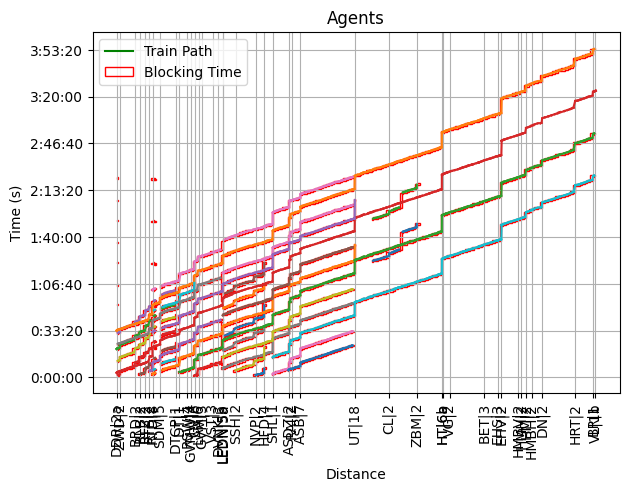

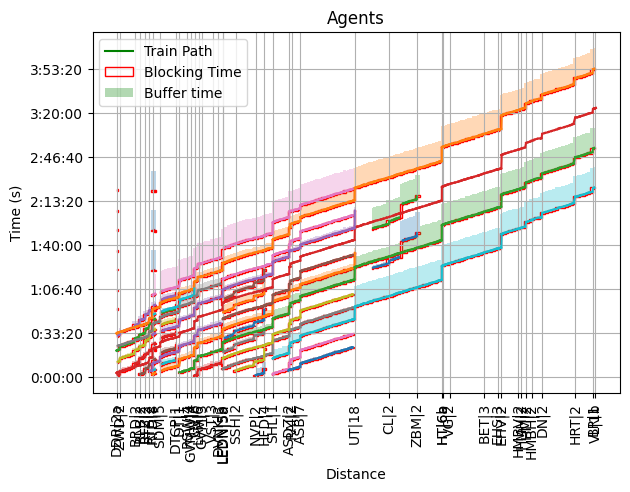

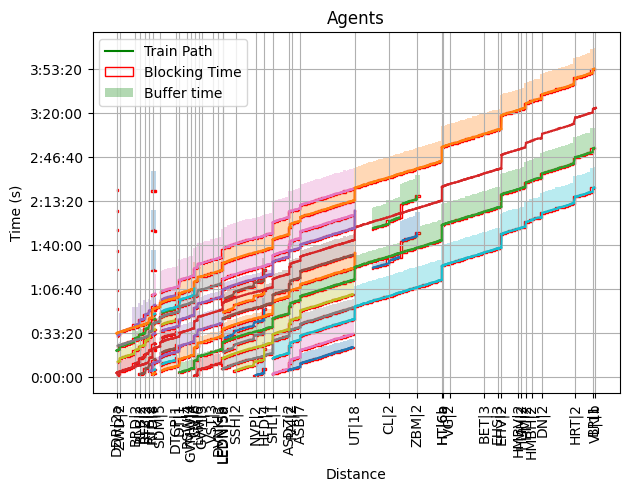

In [109]:
for exp in experiments:
    exp.s.plot(agent_id, exp.block_intervals, exp.buffer_times, exp.recovery_times, True)

### Time statistics

In [112]:
def sum_cols(df1, cols, name):
    df2 = df1.drop(columns=cols)
    df2[name] = df1[cols].sum(axis=1)
    return df2

time_df = pd.DataFrame([exp.get_running_time() for exp in experiments], index=[exp.metadata['label'] for exp in experiments])

setup_cols = ["track graph creation", "routing graph creation"]
recompute_cols = ["unsafe interval generation", "safe interval generation", "bt and crt generation", "converting routes to blocks"]
search_cols = ["FlexSIPP search time"]

time_df = sum_cols(time_df, setup_cols, "Setup Time")
time_df = sum_cols(time_df, recompute_cols, "Recompute Time")
time_df = sum_cols(time_df, search_cols, "Search Time")
time_df

,Setup Time,Recompute Time,Search Time
No flexibility,67.438534,236.065050,7.293
Buffer time,67.438534,235.538854,14.993
Recovery time,67.438534,235.782153,15.619


### Search Node Statistics


In [113]:
nodes_df = pd.DataFrame([exp.get_complexity() for exp in experiments], index=[exp.metadata['label'] for exp in experiments])

nodes_df

,nodes generated,nodes decreased,nodes expanded
No flexibility,346,53,137
Buffer time,441,59,215
Recovery time,534,33,270


### Output paths found


In [114]:
for key, value in experiments[2].results[3].items():
    delayed_trains = {i: v for i,v in enumerate(value[0][4]) if float(v[0]) > 0}
    print(f"{key.replace('r-', '')}\nearliest departure: {int(min(float(value[0][1]), float(value[0][2])) / 60)}\ndepart before: {int(float(value[0][2]) / 60)}\narrive at: {int((float(value[0][1]) + float(value[0][3])) / 60)}\ndelays trains: {delayed_trains}")

Gv|244;Gv|1822;Laa|1820;Laa|1818;Gvm|190;Gvm|170;Gvm|866;Gvm_Ledn|856;Gvm_Ledn|846;Gvm_Ledn|836;Gvm_Ledn|826;Gvm_Ledn|816;Gvm_Ledn|806;Ledn|1114;Ledn|1066;Ledn|1030;Ledn|1992;Hfd_Ledn|1990;Hfd_Ledn|1986;Hfd_Ledn|1984;Hfd_Ledn|1982;Hfd_Ledn|1980;Hfd_Ledn|1978;Hfd_Ledn|1976;Hfd_Ledn|1974;Hfd_Ledn|1972;Hfd_Ledn|1970;Hfd|1232;Hfd|1212;Hfd|1152;Hfd|1138;Hfd|1118;Hfd_Shl|1776;Hfd_Shl|1762;Shl|1086;Shl|1068;Shl|1062;Shl|1032;Asra_Shl|1740;Asra_Shl|1726;Asra|1308;Asra|1024;Asdzo|704;Asdzo|1404;Asdzo|744;Asdzo|764
earliest departure: 42
depart before: 42
arrive at: 64
delays trains: {56: ['209.505', '233.691', '1437.12'], 72: ['210.852', '235.038', '2012.68']}
Gv|244;Gv|1822;Laa|1820;Laa|1818;Gvm|190;Gvm|170;Gvm|866;Gvm_Ledn|856;Gvm_Ledn|846;Gvm_Ledn|836;Gvm_Ledn|826;Gvm_Ledn|816;Gvm_Ledn|806;Ledn|1114;Ledn|1066;Ledn|1030;Ledn|1992;Hfd_Ledn|1990;Hfd_Ledn|1986;Hfd_Ledn|1984;Hfd_Ledn|1982;Hfd_Ledn|1980;Hfd_Ledn|1978;Hfd_Ledn|1976;Hfd_Ledn|1974;Hfd_Ledn|1972;Hfd_Ledn|1970;Hfd|1232;Hfd|1212;Hfd|115

### Path statistics


In [115]:
for exp in experiments:
    print(f"Differend paths found for {exp.metadata['label']}: {sum(exp.results[2].values())}")

Differend paths found for No flexibility: 1
Differend paths found for Buffer time: 1
Differend paths found for Recovery time: 3
